# Paid with Models: Optimal Contract Design for Collaborative Machine Learning
## Experiment: Multi-type Case

In [1]:
# Import relevant packages
from ContractSol_SGB import *
from MultitypeVisualizer import *
import matplotlib.pyplot as plt
import time
from Generalization_Bounds_Setup import *

### Calculate the Optimal Contracts

In [2]:
N = 10
p = np.repeat(0.2,5)
c_case1 = np.linspace(0.2, 0.04, 5)
c_case2 = np.linspace(1, 0.4, 5)
c_case3 = np.array([0.5, 0.4, 0.03, 0.02, 0.001])
k = 1

c_cases = [c_case1, c_case2, c_case3]

contract_sol = []

start_time = time.time()
for i, c in enumerate(c_cases):
    print('-'*43 + f'{{ Scenario {i+1} }}'+ '-'*43 )
    print(f'cost structure: {c}')
    contract_sol.append(ContractSol_SGB(N, p, c, k, (a, a_der, a_hess), (v, v_der, v_hess), True, 2000, True))
    print('-'*100)
    print('')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

-------------------------------------------{ Scenario 1 }-------------------------------------------
cost structure: [0.2  0.16 0.12 0.08 0.04]
`gtol` termination condition is satisfied.
Number of iterations: 63, function evaluations: 69, CG iterations: 72, optimality: 9.11e-09, constraint violation: 1.25e-14, execution time: 0.23 s.
Result: [391.01769307 391.78419325 392.3847326  393.14830179 424.68693801
  84.97363539  85.09627542  85.16834014  85.22942568  86.49097113]
Success: True
Reservation Utility: [ 6.77009678 13.15161373 20.74508109 30.34425719 44.1605214 ]
Utility: [ 6.77009678 22.4108045  38.08217223 53.77756153 69.5034936 ]
Expected Value: [86.47462405 86.47499366 86.47528333 86.47565177 86.49098283]
----------------------------------------------------------------------------------------------------

-------------------------------------------{ Scenario 2 }-------------------------------------------
cost structure: [1.   0.85 0.7  0.55 0.4 ]
`gtol` termination condition is

### Visualize the Optimal Contracts

#### Scenario 1: All types have non-zero reservation utilities.

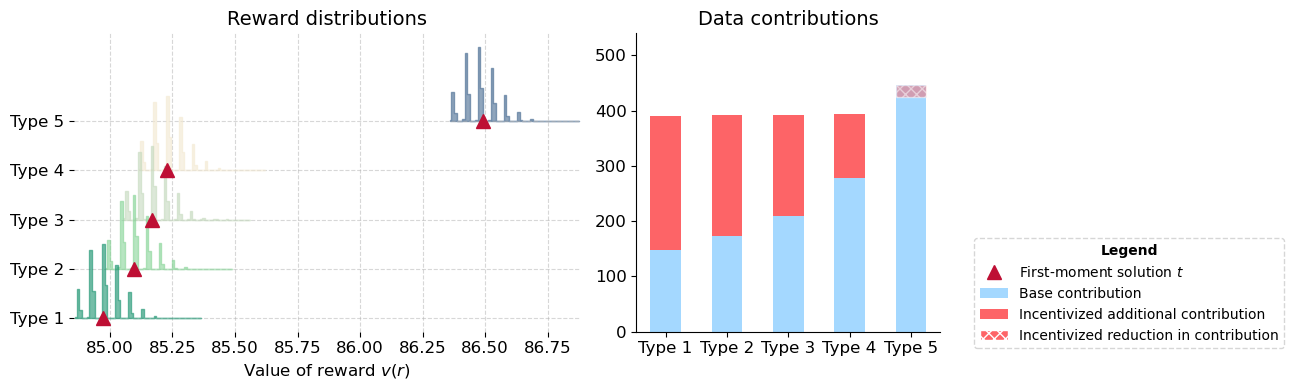

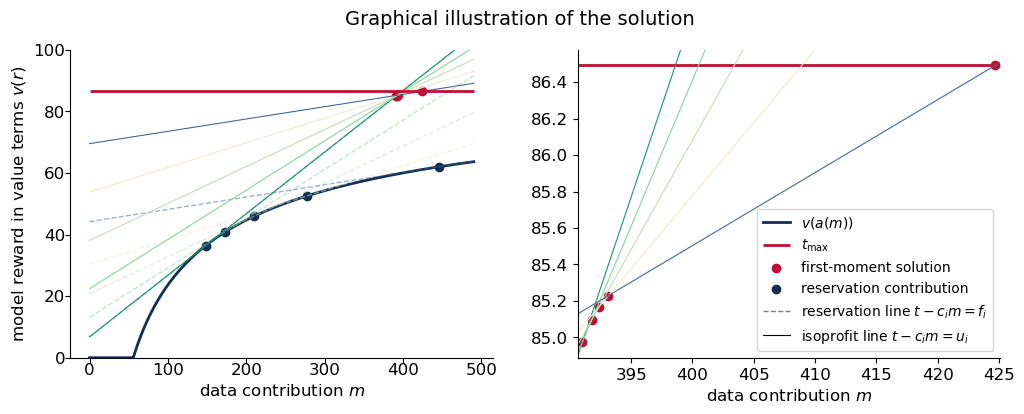

In [3]:
sol, res_u,res_m, t_bar = contract_sol[0]['mt'], contract_sol[0]['reserv_u'], contract_sol[0]['reserv_m'], contract_sol[0]['t_bar']
case_by_case, prob_outcomes, t_ratios = realizedDistribution(sol, N, p, t_bar, v, a)
t_dist = RewardDistributions(sol, N, p, t_bar, v, a)
VisualizeTM(sol, t_dist, res_u, res_m, c, case_by_case, prob_outcomes, True,)
GraphicalIllustration(sol, res_m, t_bar, c_case1, v, a)

In [4]:
t_bar, contract_sol[0]['E[v(a_max)]'], res_m

(array([86.47462405, 86.47499366, 86.47528333, 86.47565177, 86.49098283]),
 86.47827301929004,
 array([148.06003631, 172.54378373, 210.15472005, 277.41393038,
        445.70238734]))

In [5]:
def GraphicalIllustration(sol, res_m, t_bar, c, v, a, ax = None):
    """
    Generate a graphical illustration of the optimal contract in 2D.

    Args:
        sol (ndarray): Optimal contributions of the types m.
        res_m (ndarray): Reservation contributions of the types m.
        t_bar (ndarray): maximal rewardable model values expected by different agent types—this is used in propostional assignment
        c (ndarray): Private costs of the agents.
        v (func): Valuation function.
        a (func): Accuracy function.
        ax (Axes): Optional. If not None, the ax is used for the plot. Default is None.

    Returns:
        None. 
    """  
    m, t = sol[:int(len(sol)/2)], sol[int(len(sol)/2):]
    bool_noax = False
    if type(ax) == type(None):
        bool_noax = True
        fig, ax = plt.subplots(1,2, figsize = (12,4))
    x = np.linspace(0, np.max([m, res_m])*1.1, 1000)

    def plot_f(m, c, x):
        intercept = v(a(m))-c*m
        y = intercept.reshape(-1,1) + c.reshape(-1,1)*x
        return y

    def plot_u(m, t, c, x):
        intercept = t-c*m
        y = intercept.reshape(-1,1) + c.reshape(-1,1)*x
        return y

    ax[0].plot(x, v(a(x)), color = accent3, linewidth = 2, label = '$v(a(m))$')

    # f lines
    f_lines = plot_f(res_m,c,x)
    u_lines = plot_u(m,t,c,x)
    for i, f_line in enumerate(f_lines):
        ax[0].plot(x, f_line, linestyle = '--', linewidth = 1, alpha = 0.5, color = c_theme[i+1])
    for i, u_line in enumerate(u_lines):
        ax[0].plot(x, u_line, linestyle = '-', linewidth = 0.8, alpha = 1, color = c_theme[i+1])
    for t_bar_i in t_bar[:-1]:
        ax[0].hlines(t_bar_i, min(x), max(x), color = accent, linewidth = 0.5, label = '$t_\mathrm{max}$')
    ax[0].hlines(t_bar[-1], min(x), max(x), color = accent, linewidth = 2, label = '$t_\mathrm{max}$')
    ax[0].scatter(m,t, color = accent, label = 'first-moment solution')

    ax[0].scatter(res_m, v(a(res_m)), color = accent3, label = 'reservation contribution')
    ax[0].set_ylim(v(a(np.min(x)))*0.95,100)

    handles, labels = ax[0].get_legend_handles_labels()
    handles.append(Line2D([0], [0], color='black', linestyle='--', linewidth = 1, alpha = 0.5, label='reservation line $t-c_i m = f_i$'))
    handles.append(Line2D([0], [0], color='black', linestyle='-', linewidth = 0.8, label='isoprofit line $t-c_i m = u_i$'))

    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].tick_params(axis='both', which='major', labelsize=12, pad=0) 
    ax[0].set_xlabel('data contribution $m$', fontsize = 12)
    ax[0].set_ylabel('model reward in value terms $v(r)$', fontsize = 12)


    ax[1].hlines(t_bar[-1], min(x), max(x), color = accent, linewidth = 2, label = '$t_\mathrm{max}$')
    ax[1].scatter(m,t, color = accent, label = 'first-moment solution')
    for i, u_line in enumerate(u_lines):
        ax[1].plot(x, u_line, linestyle = '-', linewidth = 0.8, alpha = 1, color = c_theme[i+1])
    ax[1].set_ylim(np.min(t)*0.999,np.max(t)*1.001)
    ax[1].set_xlim(np.min(m)*0.999,np.max(m)*1.001)
    ax[1].set_xlabel('data contribution $m$', fontsize = 12)
    ax[1].tick_params(axis='both', which='major', labelsize=12) 
    fig.suptitle("Graphical illustration of the solution", fontsize = 14)
    ax[1].legend(handles=handles, fontsize =10, loc = 'lower right')
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    if bool_noax:
        plt.show()

#### Scenario 2: All types have zero reservation utilities.

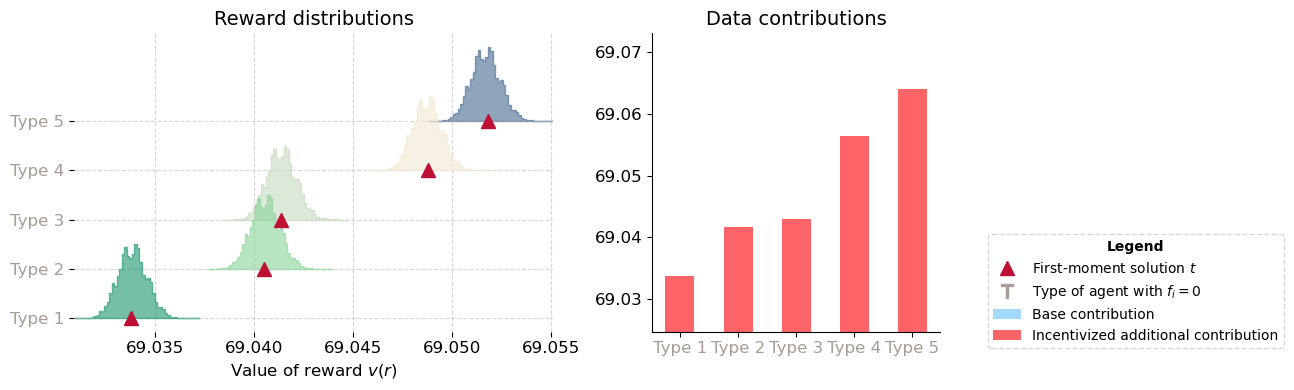

In [6]:
sol, res_u,res_m, t_bar = contract_sol[1]['mt'], contract_sol[1]['reserv_u'], contract_sol[1]['reserv_m'], contract_sol[1]['t_bar']
case_by_case, prob_outcomes, t_ratios = realizedDistribution(sol, N, p, t_bar, v, a)
t_dist = RewardDistributions(sol, N, p, t_bar, v, a)
VisualizeTM(sol, t_dist, res_u, res_m, c, case_by_case, prob_outcomes, True, True, 0.3)

#### Scenario 3: Some types have zero reservation utilities and others not.

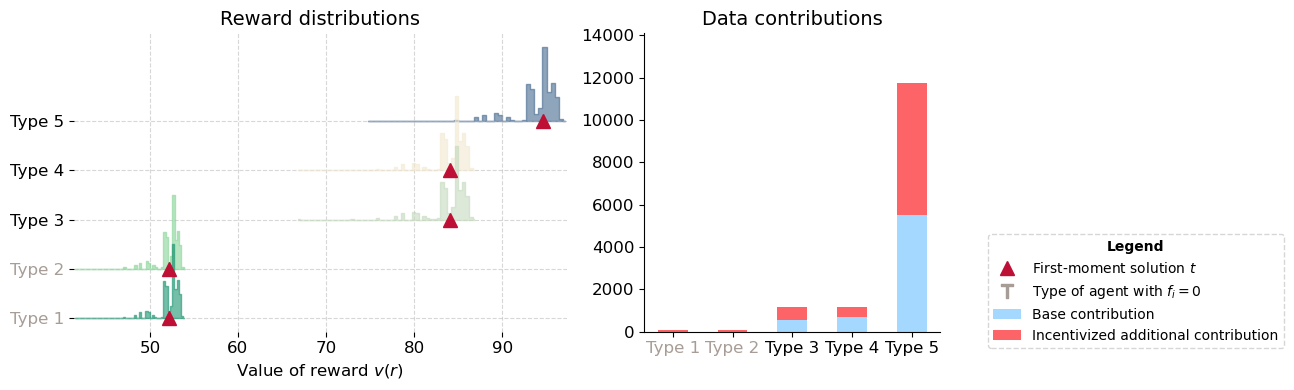

In [7]:
sol, res_u,res_m, t_bar = contract_sol[2]['mt'], contract_sol[2]['reserv_u'], contract_sol[2]['reserv_m'], contract_sol[2]['t_bar']
case_by_case, prob_outcomes, t_ratios = realizedDistribution(sol, N, p, t_bar, v, a)
t_dist = RewardDistributions(sol, N, p, t_bar, v, a)
VisualizeTM(sol, t_dist, res_u, res_m, c, case_by_case, prob_outcomes, True)

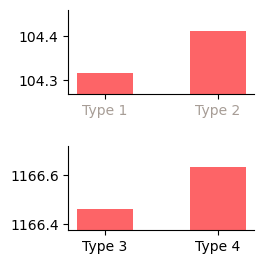

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (3,3))

VisualizeContribution_ZoomIn(sol[:2], res_m[:2], ax1, flex_scale = True, margin = 0.5)
VisualizeContribution_ZoomIn(sol[2:4], res_m[2:4], ax2, flex_scale = True, margin = 0.5, types = ['Type 3', 'Type 4'])
plt.tight_layout(pad = 2)

### Amalgamating the plots in one column

In [94]:
def VisualizeReward_plugin(sol, t_dist, res_u, c, case_by_case, prob_outcomes, ax = None, show_title = True):
    # Example data: a list of tuples (case_by_case, prob_outcomes)
    m, t = sol[:int(len(sol)/2)], sol[int(len(sol)/2):]

    data = [ (t_dist[:,i], prob_outcomes) for i in range(len(c))]


    # Create the ridge plot
    bool_noax = False
    if not ax:
        bool_noax = True
        fig, ax = plt.subplots(figsize=(10, 6))
    num_bins = int(np.max([10, np.round(len(prob_outcomes)/100,-1)]))

    y_offset = 0.4  # Adjust the offset to control the amount of overlap
    # Iterate through the data in the original order
    for i, (case_by_case, prob_outcomes) in enumerate(data):
        # Create histogram
        hist, bins = np.histogram(case_by_case, bins=num_bins*5, weights=prob_outcomes, density=False)
        bin_centers = 0.5 * (bins[1:] + bins[:-1])
        # Normalize the histogram to create the overlapping effect
        hist = hist / hist.max() * 0.6
        # Plot the histogram as filled areas
        ax.fill_between(bin_centers, i * y_offset, i * y_offset + hist, step="mid", alpha=0.6, color = c_theme[i+1], zorder=len(data) - i)
        #ax.plot(bin_centers, i * y_offset + hist, color='b', zorder=len(data) - i)
        ax.plot(t[i], i * y_offset, '^', color=accent, markersize=10, zorder=len(data) + 1, label='First-moment solution $t$' if i == 0 else "")


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(True, linestyle='--', alpha=0.5, zorder=0)

    # Adjust y-ticks and y-tick labels
    ax.set_yticks([i * y_offset for i in range(len(data))])
    ax.set_yticklabels([f'Type {i+1}' for i in range(len(data))])


    ax.set_xlabel('Value of reward $v(r)$', fontsize = 12)
    ax.set_xlim(np.max([-10, np.min(t_dist)]),np.max(t_dist))
    if show_title:
        ax.set_title('Reward distributions', fontsize = 14)

    # Types that will not train on their own
    if len(np.where(res_u==0)[0]):
        non_training_thresh = np.max(np.where(res_u==0))
        for tick in ax.get_yticklabels():
            tick_value = int(tick.get_text()[5:])-1
            if tick_value <= non_training_thresh:
                tick.set_color(accent2)

    handles, labels = ax.get_legend_handles_labels()
    if len(np.where(res_u==0)[0]):
        text_legend = Line2D([0], [0], marker=r'$\mathrm{T}$', color=accent2, label='Type of agent with $f_i = 0$', markerfacecolor=accent2, markersize=10, linestyle='None')
        handles.append(text_legend)
        labels.append('Type of agent with $f_i = 0$')
    ax.tick_params(axis='both', which='major', labelsize=12) 
    ax.legend(handles=handles, labels=labels, loc='upper left', fontsize = 12)
    if bool_noax:
        plt.tight_layout()
        plt.show()

def VisualizeContribution_plugin(sol, res_m, ax = None, flex_scale = False, margin = 1, show_title = True):
    m = sol[:int(len(sol)/2)]
    def ceil_round(value, digit):
        unit = (10**(-digit))
        return np.ceil(value / unit) * unit
    def floor_round(value, digit):
        unit = (10**(-digit))
        return np.floor(value / unit) * unit

    colours = ["#a4d8ff","#FD6467"]

    types = [f'Type {i+1}' for i in range(len(m))]
    weight_counts = {
        "Base contribution": res_m,
        "Incentivized additional contribution": m-res_m,
    }
    width = 0.5
    
    bool_noax = False
    if not ax:
        bool_noax = True
        fig, ax = plt.subplots()
    bottom = np.zeros(5)


    for idx, (label, weight_count) in enumerate(weight_counts.items()):
        for i in range(len(weight_count)):
            color = colours[idx]
            hatch = 'xxx' if weight_count[i] < 0 else None
            edgecolor = 'white' if weight_count[i] < 0 else None
            alpha = 0.5 if weight_count[i] < 0 else 1
            ax.bar(types[i], weight_count[i], width, label=label if i == 0 else "", bottom=bottom[i], color=color, hatch=hatch, edgecolor = edgecolor, alpha = alpha)
            bottom[i] += weight_count[i]
    if show_title:
        ax.set_title("Data contributions", fontsize = 14)
    if flex_scale:
        yrange = np.max([m,res_m]) - np.min(m)
        ax.set_ylim(np.min(m) - yrange*margin, np.max([m,res_m]) + yrange*margin)
    else:
        ax.set_ylim(0, ceil_round(np.max([m,res_m])*1.2, -1))

    # Combine all patches into a single legend
    handles, _ = ax.get_legend_handles_labels()
    if (m - res_m  < 0).any():
        neg_patch = mpatches.Patch(facecolor= "#FD6467", edgecolor='white', hatch='xxx', label='Incentivized reduction in contribution')
        handles.append(neg_patch)

    # Types that will not train on their own
    if len(np.where(res_m==0)[0]):
        non_training_thresh = np.max(np.where(res_m==0))
        for tick in ax.get_xticklabels():
            tick_value = int(tick.get_text()[5:])-1
            if tick_value <= non_training_thresh:
                tick.set_color(accent2)
    # Rotate the labels
    for label in ax.get_xticklabels():
        label.set_rotation(20)
    
    if bool_noax:
        if len(np.where(res_m==0)[0]):
            text_legend = Line2D([0], [0], marker=r'$\mathrm{T}$', color=accent2, label='Type of agent with $f_i = 0$', markerfacecolor=accent2, markersize=10, linestyle='None')
            handles.append(text_legend) 
    ax.legend(handles=handles, loc="upper left", fontsize = 12)
    ax.tick_params(axis='both', which='major', labelsize=12) 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if bool_noax:
        plt.show()

def VisualizeTM_plugin(axes, sol, t_dist, res_u, res_m, c, case_by_case, prob_outcomes, one_legend = False, flex_scale = False, margin = 1, show_title = True):

    (ax1, ax2) = axes
    VisualizeReward_plugin(sol, t_dist, res_u, c, case_by_case, prob_outcomes, ax1, show_title)
    VisualizeContribution_plugin(sol, res_m, ax2, flex_scale, margin, show_title)
    if one_legend:
        handles1, labels1 = ax1.get_legend().legend_handles, [text.get_text() for text in ax1.get_legend().texts]
        handles2, labels2 = ax2.get_legend().legend_handles, [text.get_text() for text in ax2.get_legend().texts]
        handles = handles1 + handles2
        labels = labels1 + labels2
        # Remove individual legends
        ax1.legend().remove()
        ax2.legend().remove()
    
    return handles, labels

def VisualizePanel(contract_sol):

    fig, axes = plt.subplots(3, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(9, 12))
    # Plot Scenario 1

    for i, scenario in enumerate(contract_sol):
        sol, res_u,res_m, t_bar = scenario['mt'], scenario['reserv_u'], scenario['reserv_m'], scenario['t_bar']
        case_by_case, prob_outcomes, t_ratios = realizedDistribution(sol, N, p, t_bar, v, a)
        t_dist = RewardDistributions(sol, N, p, t_bar, v, a)
        scenario_handles, scenario_labels = VisualizeTM_plugin((axes[i][0],axes[i][1]), sol, t_dist, res_u, res_m, c, case_by_case, prob_outcomes, True, True if i == 1 else False, 0.3 , show_title = True if i == 0 else False)
        if i == 0:
            handles = scenario_handles
            labels = scenario_labels
        if i > 0:
            for k, label in enumerate(scenario_labels):
                if label not in labels:
                    handles.append(scenario_handles[k])
                    labels.append(label)

    # Create a combined legend
    legend = fig.legend(handles, labels, ncol = 2, loc='lower center', bbox_to_anchor=(0.5, 0.005), fontsize = 13)
    legend.set_title('Legend', prop={'weight': 'bold', 'size': 13})
    legend.get_frame().set_linestyle('--')    

    # Adjust layout to make space for the legend
    plt.tight_layout(rect=[0, 0.1, 1, 1])
    plt.show()

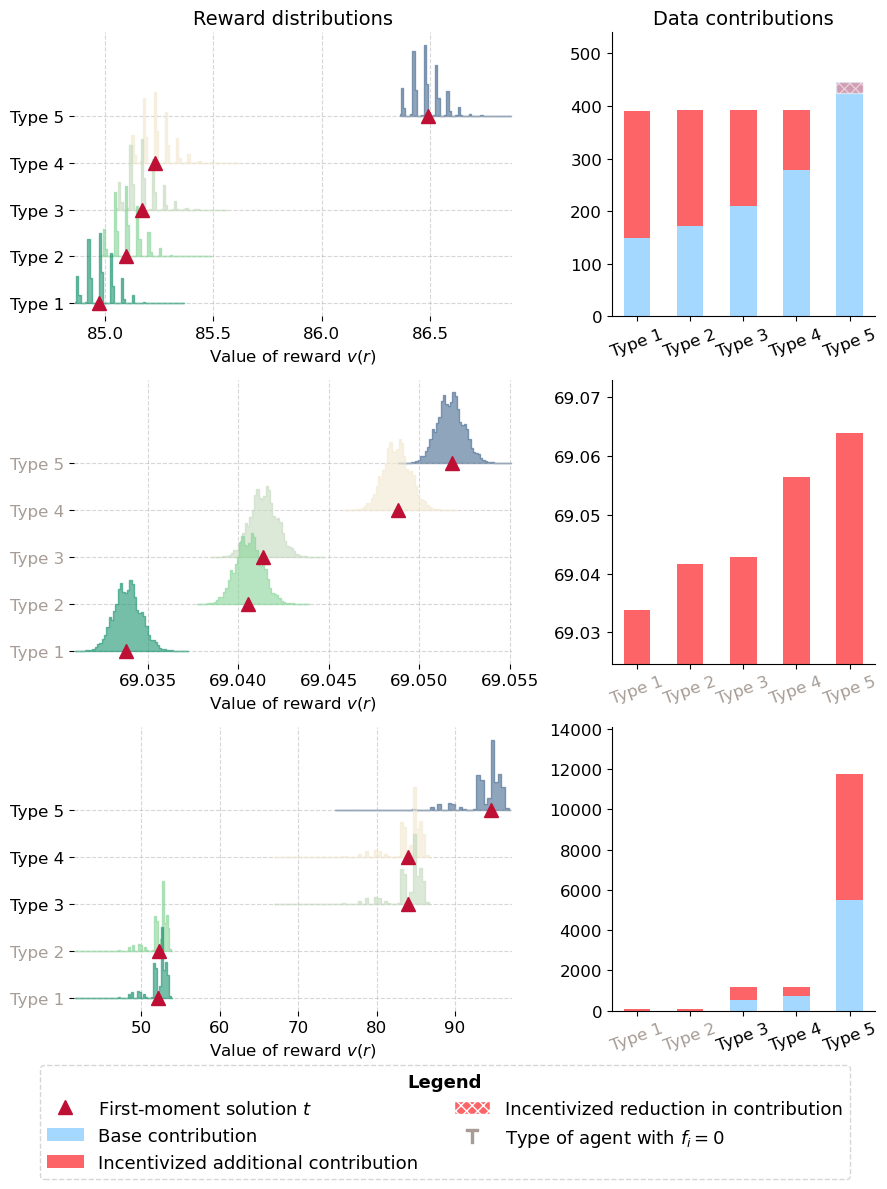

In [95]:
VisualizePanel(contract_sol)